<a href="https://colab.research.google.com/github/ArpitKadam/Attention-Is-All-You-Code/blob/main/GPT_Tokenizer_and_Dataloaders.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **ENCODER**

## **Step-1**: Creating Tokens

In [ ]:
with open("/content/the-verdict.txt", "r", encoding="utf-8") as file:
    raw_text = file.read()

print("Total characters in the text file:", len(raw_text))

Total characters in the text file: 20479


In [ ]:
import re
text = "Hey, hii how are you? I am fine."

result = re.split(r"([,.]|\s)", text)

In [ ]:
result = [item for item in result if item.strip()]

In [ ]:
result

['Hey', ',', 'hii', 'how', 'are', 'you?', 'I', 'am', 'fine', '.']

In [ ]:
text = "Hello!! World!!! Is this-- a test??"

result = re.split(r"([,:;()\"'!.?]|--|\s)", text)
result = [item for item in result if item.split()]
print(result)

['Hello', '!', '!', 'World', '!', '!', '!', 'Is', 'this', '--', 'a', 'test', '?', '?']


In [ ]:
preprocessed_text = re.split(r"([,:;()\"'!.?]|--|\s)", raw_text)
preprocessed_text = [item for item in preprocessed_text if item.split()]
print(preprocessed_text[80:100])

['was', 'what', 'the', 'women', 'called', 'it', '.', 'I', 'can', 'hear', 'Mrs', '.', 'Gideon', 'Thwing', '--', 'his', 'last', 'Chicago', 'sitter', '--']


In [ ]:
len(preprocessed_text)

4654

## **Step-2:** Creating Token-IDs

set() -> Build an unordered collection of unique elements

In [ ]:
all_words = sorted(set(preprocessed_text))

len(all_words)

1139

In [ ]:
vocab = {token:integer for integer, token in enumerate(all_words)}

In [ ]:
for word, i in vocab.items():
  print(word, i)
  if i>20:
    break

! 0
" 1
' 2
( 3
) 4
, 5
-- 6
. 7
: 8
; 9
? 10
A 11
Ah 12
Among 13
And 14
Are 15
Arrt 16
As 17
At 18
Be 19
Begin 20
Burlington 21


In [ ]:
for i, items in enumerate(vocab.items()):
  print(items)
  if i > 20:
    break

('!', 0)
('"', 1)
("'", 2)
('(', 3)
(')', 4)
(',', 5)
('--', 6)
('.', 7)
(':', 8)
(';', 9)
('?', 10)
('A', 11)
('Ah', 12)
('Among', 13)
('And', 14)
('Are', 15)
('Arrt', 16)
('As', 17)
('At', 18)
('Be', 19)
('Begin', 20)
('Burlington', 21)


## **Step-3:** Tokenizer Class

In [ ]:
class SimpleTokenizerV1:
  def __init__(self, vocab):
    self.str_to_int = vocab
    self.int_to_str = {i:s for s, i in vocab.items()}

  def encode(self, text):
    """
    Encodes a given text string into a list of integer IDs based on the vocabulary.
    It preprocesses the text by splitting it into tokens and then maps each token
    to its corresponding integer ID.
    """
    preprocessed = re.split(r"([,:;()\"'!.?]|--|\s)", text)
    preprocessed = [item.strip() for item in preprocessed if item.split()]
    encoded_ids = [self.str_to_int[token] for token in preprocessed]
    return encoded_ids

  def decode(self, encoded_ids):
    """
    Decodes a list of integer IDs back into a human-readable text string.
    It reconstructs the text by joining the tokens corresponding to the IDs,
    and then attempts to re-attach punctuation for better readability.
    """
    text = " ".join([self.int_to_str[id] for id in encoded_ids])
    text = re.sub(r'\s+([,.?!"\'])', r"\1", text)
    return text

In [ ]:
tokenizer = SimpleTokenizerV1(vocab)

encoded_ids = tokenizer.encode("""I have mentioned that Mrs. Gisburn was rich; and it was
                    immediately perceptible that her husband was extracting from this circumstance a
                    delicate but substantial satisfaction.""")

decoded_text = tokenizer.decode(encoded_ids)

print(encoded_ids)
print(decoded_text)

[53, 541, 677, 996, 67, 7, 38, 1086, 851, 9, 170, 596, 1086, 578, 774, 996, 550, 573, 1086, 427, 489, 1008, 279, 129, 336, 252, 956, 862, 7]
I have mentioned that Mrs. Gisburn was rich ; and it was immediately perceptible that her husband was extracting from this circumstance a delicate but substantial satisfaction.


## **Step-4:** Adding Special Context Tokens

In [ ]:
all_tokens = sorted(list(set(preprocessed_text)))

all_tokens.extend(["<|endoftext|>", "<|unk|>"])

vocab = {token:integer for integer, token in enumerate(all_tokens)}

In [ ]:
len(vocab)

1141

In [ ]:
list(vocab.items())[-10:]

[('year', 1131),
 ('years', 1132),
 ('yellow', 1133),
 ('yet', 1134),
 ('you', 1135),
 ('younger', 1136),
 ('your', 1137),
 ('yourself', 1138),
 ('<|endoftext|>', 1139),
 ('<|unk|>', 1140)]

In [ ]:
class SimpleTokenizerV2:
  def __init__(self, vocab):
    self.str_to_int = vocab
    self.int_to_str = {i:s for s, i in vocab.items()}

  def encode(self, text):
    """
    Encodes a given text string into a list of integer IDs based on the vocabulary.
    It preprocesses the text by splitting it into tokens and then maps each token
    to its corresponding integer ID.
    """
    preprocessed = re.split(r"([,:;()\"'!.?]|--|\s)", text)
    preprocessed = [item.strip() for item in preprocessed if item.split()]
    preprocessed = [item if item in self.str_to_int else "<|unk|>" for item in preprocessed]
    encoded_ids = [self.str_to_int[token] for token in preprocessed]
    return encoded_ids

  def decode(self, encoded_ids):
    """
    Decodes a list of integer IDs back into a human-readable text string.
    It reconstructs the text by joining the tokens corresponding to the IDs,
    and then attempts to re-attach punctuation for better readability.
    """
    text = " ".join([self.int_to_str[id] for id in encoded_ids])
    text = re.sub(r'\s+([,.?!"\'])', r"\1", text)
    return text

In [ ]:
tokenizer = SimpleTokenizerV2(vocab)
text1 = "Hey, how are you??"
text2 = "I hope you are doing okay!!!"

text = "<|endoftext|> ".join((text1, text2))
print(text)

Hey, how are you??<|endoftext|> I hope you are doing okay!!!


In [ ]:
encoded_ids = tokenizer.encode(text)
decoded_text = tokenizer.decode(encoded_ids)

print(encoded_ids)
print(decoded_text)

[1140, 5, 571, 182, 1135, 10, 10, 1139, 53, 1140, 1135, 182, 370, 1140, 0, 0, 0]
<|unk|>, how are you?? <|endoftext|> I <|unk|> you are doing <|unk|>!!!


# **BYTE PAIR ENCODING (BPE)**

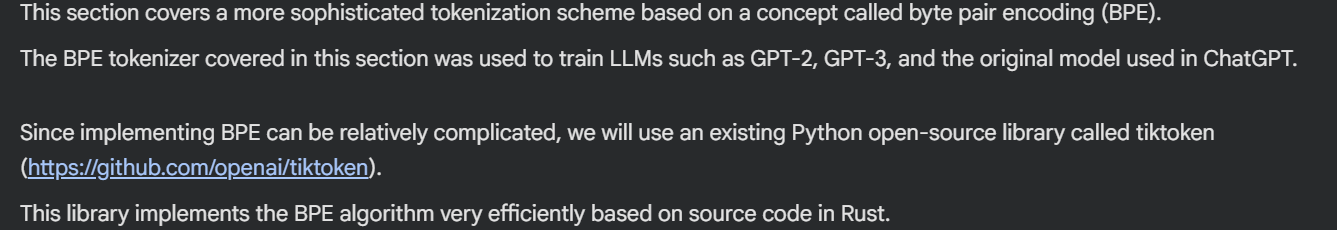

In [1]:
!pip install -Uq tiktoken

In [2]:
import importlib
import tiktoken

print("tiktoken version:", importlib.metadata.version("tiktoken"))

tiktoken version: 0.12.0


In [3]:
tokenizer = tiktoken.get_encoding("gpt2")

In [14]:
tokenizer.n_vocab

50257

In [12]:
text = (
    "Hello, do you like tea? <|endoftext|> In the sunlit terraces of someunknownPlace."
)

integers = tokenizer.encode(text, allowed_special={"<|endoftext|>"})

print(integers)

[15496, 11, 466, 345, 588, 8887, 30, 220, 50256, 554, 262, 4252, 18250, 8812, 2114, 286, 617, 34680, 27271, 13]


In [13]:
strings = tokenizer.decode(integers)

print(strings)

Hello, do you like tea? <|endoftext|> In the sunlit terraces of someunknownPlace.


In [17]:
print(tokenizer.encode("someunknownPlace"))
print(tokenizer.decode(tokenizer.encode("someunknownPlace")))

[11246, 34680, 27271]
someunknownPlace


In [19]:
tokenizer.decode([11246]), tokenizer.decode([34680]), tokenizer.decode([27271])

('some', 'unknown', 'Place')

In [20]:
print(tokenizer.encode("Ansncic ncbaic b cwbdb cud"))
print(tokenizer.decode(tokenizer.encode("Ansncic ncbaic b cwbdb cud")))

[2025, 82, 10782, 291, 299, 66, 7012, 291, 275, 269, 39346, 9945, 269, 463]
Ansncic ncbaic b cwbdb cud


In [22]:
tokenizer.decode([2025]), tokenizer.decode([82]), tokenizer.decode([10782]), tokenizer.decode([291])

('An', 's', 'nc', 'ic')

# **DATA SAMPLING WITH SLIDING WINDOW**

In [24]:
with open("/content/the-verdict.txt", "r", encoding="utf-8") as file:
    raw_text = file.read()

enc_text = tokenizer.encode(raw_text)
print(len(enc_text))

5145


In [27]:
context_size = 5

x = enc_text[:context_size]
y = enc_text[1:context_size+1]

print(x)
print(y)

[40, 367, 2885, 1464, 1807]
[367, 2885, 1464, 1807, 3619]


In [28]:
for i in range(1, context_size+1):
  context = enc_text[:i]
  desired = enc_text[i]

  print(context, "--->", desired)

[40] ---> 367
[40, 367] ---> 2885
[40, 367, 2885] ---> 1464
[40, 367, 2885, 1464] ---> 1807
[40, 367, 2885, 1464, 1807] ---> 3619


In [30]:
for i in range(1, context_size+1):
  context = enc_text[:i]
  desired = enc_text[i]

  print(tokenizer.decode(context), "--->", tokenizer.decode([desired]))

I --->  H
I H ---> AD
I HAD --->  always
I HAD always --->  thought
I HAD always thought --->  Jack


# **DATALOADERS**

In [42]:
import torch
from torch.utils.data import Dataset, DataLoader

class GPTDataSetV1(Dataset):
  def __init__(self, txt, tokenizer, max_length, stride):
    self.input_ids = []
    self.target_ids = []

    token_ids = tokenizer.encode(txt, allowed_special={"<|endoftext|>"})

    for i in range(0, len(token_ids) - max_length, stride):
      input_chunk = token_ids[i: i + max_length]
      target_chunk = token_ids[i+1: i + max_length + 1]

      self.input_ids.append(torch.tensor(input_chunk))
      self.target_ids.append(torch.tensor(target_chunk))

  def __len__(self):
    return len(self.input_ids)

  def __getitem__(self, index):
    return self.input_ids[index], self.target_ids[index]

In [43]:
def create_dataloader_v1(txt, batch_size=4, max_length=128, stride=32, shuffle=True, drop_last=True, num_workers=0):

  tokenizer = tiktoken.get_encoding("gpt2")

  dataset = GPTDataSetV1(txt, tokenizer, max_length, stride)

  dataloader = DataLoader(
      dataset, batch_size=batch_size, shuffle=shuffle, drop_last=drop_last, num_workers=num_workers
  )

  return dataloader

In [44]:
with open("/content/the-verdict.txt", "r", encoding="utf-8") as file:
    raw_text = file.read()

In [45]:
import torch
print("Pytorch Version", torch.__version__)

Pytorch Version 2.9.0+cpu


In [54]:
dataloader = create_dataloader_v1(
    raw_text,
    batch_size = 4,
    max_length = 16,
    stride = 4,
    shuffle = False,
    drop_last = True,
    num_workers = 0
)

In [57]:
data_iter = iter(dataloader)
first_batch = next(data_iter)
print("Inputs:")
print(first_batch[0])
print("Targets:")
print(first_batch[1])

Inputs:
tensor([[   40,   367,  2885,  1464,  1807,  3619,   402,   271, 10899,  2138,
           257,  7026, 15632,   438,  2016,   257],
        [ 1807,  3619,   402,   271, 10899,  2138,   257,  7026, 15632,   438,
          2016,   257,   922,  5891,  1576,   438],
        [10899,  2138,   257,  7026, 15632,   438,  2016,   257,   922,  5891,
          1576,   438,   568,   340,   373,   645],
        [15632,   438,  2016,   257,   922,  5891,  1576,   438,   568,   340,
           373,   645,  1049,  5975,   284,   502]])
Targets:
tensor([[  367,  2885,  1464,  1807,  3619,   402,   271, 10899,  2138,   257,
          7026, 15632,   438,  2016,   257,   922],
        [ 3619,   402,   271, 10899,  2138,   257,  7026, 15632,   438,  2016,
           257,   922,  5891,  1576,   438,   568],
        [ 2138,   257,  7026, 15632,   438,  2016,   257,   922,  5891,  1576,
           438,   568,   340,   373,   645,  1049],
        [  438,  2016,   257,   922,  5891,  1576,   438,   568, 